In [3]:
import json
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd

# Load the JSON file
file_path = 'C:/Users/varsh/Downloads/states_daily.json'
with open(file_path, 'r') as file:
    data = json.load(file)['states_daily']

# Convert to DataFrame
df = pd.DataFrame(data)

# Convert date columns to datetime
df['date'] = pd.to_datetime(df['date'], format='%d-%b-%y')
df['dateymd'] = pd.to_datetime(df['dateymd'])

def get_totals(df, status):
    num_columns = df.columns[1:-2]  # Exclude 'date', 'dateymd', and 'status' columns
    return df[df['status'] == status][num_columns].apply(pd.to_numeric, errors='coerce').sum()

def filter_data(df, start_date, end_date):
    return df[(df['date'] >= start_date) & (df['date'] <= end_date)]

def total_counts(df, start_date, end_date):
    df_filtered = filter_data(df, start_date, end_date)
    confirmed_total = get_totals(df_filtered, 'Confirmed')
    recovered_total = get_totals(df_filtered, 'Recovered')
    deceased_total = get_totals(df_filtered, 'Deceased')
    return confirmed_total.sum(), recovered_total.sum(), deceased_total.sum()

def state_counts(df, state, start_date, end_date):
    df_filtered = filter_data(df, start_date, end_date)
    confirmed_total = df_filtered[df_filtered['status'] == 'Confirmed'][state].astype(int).sum()
    recovered_total = df_filtered[df_filtered['status'] == 'Recovered'][state].astype(int).sum()
    deceased_total = df_filtered[df_filtered['status'] == 'Deceased'][state].astype(int).sum()
    return confirmed_total, recovered_total, deceased_total

def combined_state_counts(df, states, start_date, end_date):
    df_filtered = filter_data(df, start_date, end_date)
    confirmed_total = df_filtered[df_filtered['status'] == 'Confirmed'][states].apply(pd.to_numeric, errors='coerce').sum().sum()
    recovered_total = df_filtered[df_filtered['status'] == 'Recovered'][states].apply(pd.to_numeric, errors='coerce').sum().sum()
    deceased_total = df_filtered[df_filtered['status'] == 'Deceased'][states].apply(pd.to_numeric, errors='coerce').sum().sum()
    return confirmed_total, recovered_total, deceased_total

def highest_affected_state(df, end_date):
    df_filtered = df[df['date'] <= end_date]
    confirmed_state = df_filtered[df_filtered['status'] == 'Confirmed'].iloc[:, 1:-2].apply(pd.to_numeric, errors='coerce').sum().idxmax()
    recovered_state = df_filtered[df_filtered['status'] == 'Recovered'].iloc[:, 1:-2].apply(pd.to_numeric, errors='coerce').sum().idxmax()
    deceased_state = df_filtered[df_filtered['status'] == 'Deceased'].iloc[:, 1:-2].apply(pd.to_numeric, errors='coerce').sum().idxmax()
    return confirmed_state, recovered_state, deceased_state

def lowest_affected_state(df, end_date):
    df_filtered = df[df['date'] <= end_date]
    confirmed_state = df_filtered[df_filtered['status'] == 'Confirmed'].iloc[:, 1:-2].apply(pd.to_numeric, errors='coerce').sum().idxmin()
    recovered_state = df_filtered[df_filtered['status'] == 'Recovered'].iloc[:, 1:-2].apply(pd.to_numeric, errors='coerce').sum().idxmin()
    deceased_state = df_filtered[df_filtered['status'] == 'Deceased'].iloc[:, 1:-2].apply(pd.to_numeric, errors='coerce').sum().idxmin()
    return confirmed_state, recovered_state, deceased_state

def highest_spike_in_a_day(df, state, start_date, end_date):
    df_filtered = filter_data(df, start_date, end_date)
    df_confirmed = df_filtered[df_filtered['status'] == 'Confirmed']
    df_recovered = df_filtered[df_filtered['status'] == 'Recovered']
    df_deceased = df_filtered[df_filtered['status'] == 'Deceased']

    highest_spike_confirmed = df_confirmed[state].astype(int).max()
    highest_spike_confirmed_date = df_confirmed[df_confirmed[state].astype(int) == highest_spike_confirmed]['dateymd'].values[0]

    highest_spike_recovered = df_recovered[state].astype(int).max()
    highest_spike_recovered_date = df_recovered[df_recovered[state].astype(int) == highest_spike_recovered]['dateymd'].values[0]

    highest_spike_deceased = df_deceased[state].astype(int).max()
    highest_spike_deceased_date = df_deceased[df_deceased[state].astype(int) == highest_spike_deceased]['dateymd'].values[0]

    return (highest_spike_confirmed, highest_spike_confirmed_date), (highest_spike_recovered, highest_spike_recovered_date), (highest_spike_deceased, highest_spike_deceased_date)

def active_cases_on_date(df, date):
    df_filtered = df[df['date'] == date]
    confirmed = df_filtered[df_filtered['status'] == 'Confirmed'].iloc[:, 1:-2].apply(pd.to_numeric, errors='coerce')
    recovered = df_filtered[df_filtered['status'] == 'Recovered'].iloc[:, 1:-2].apply(pd.to_numeric, errors='coerce')
    deceased = df_filtered[df_filtered['status'] == 'Deceased'].iloc[:, 1:-2].apply(pd.to_numeric, errors='coerce')

    active_cases = confirmed - (recovered + deceased)
    return active_cases

# Example Usage:
start_date = '2020-03-14'
end_date = '2020-09-30'
state_end_date = '2020-09-05'

# 1. Total counts
confirmed_total, recovered_total, deceased_total = total_counts(df, start_date, end_date)
print(f'Total Confirmed: {confirmed_total}, Total Recovered: {recovered_total}, Total Deceased: {deceased_total}')

# 2. Total counts for Delhi
confirmed_delhi, recovered_delhi, deceased_delhi = state_counts(df, 'dl', start_date, state_end_date)
print(f'Delhi Confirmed: {confirmed_delhi}, Delhi Recovered: {recovered_delhi}, Delhi Deceased: {deceased_delhi}')

# 3. Total counts for Delhi and Karnataka
states = ['dl', 'ka']
confirmed_dk, recovered_dk, deceased_dk = combined_state_counts(df, states, start_date, state_end_date)
print(f'Delhi+Karnataka Confirmed: {confirmed_dk}, Delhi+Karnataka Recovered: {recovered_dk}, Delhi+Karnataka Deceased: {deceased_dk}')

# 4. Highest affected state
highest_confirmed, highest_recovered, highest_deceased = highest_affected_state(df, state_end_date)
print(f'Highest Confirmed State: {highest_confirmed}, Highest Recovered State: {highest_recovered}, Highest Deceased State: {highest_deceased}')

# 5. Lowest affected state
lowest_confirmed, lowest_recovered, lowest_deceased = lowest_affected_state(df, state_end_date)
print(f'Lowest Confirmed State: {lowest_confirmed}, Lowest Recovered State: {lowest_recovered}, Lowest Deceased State: {lowest_deceased}')

# 6. Highest spike in a day for Delhi
highest_spike_confirmed, highest_spike_recovered, highest_spike_deceased = highest_spike_in_a_day(df, 'dl', start_date, state_end_date)
print(f'Highest spike in Confirmed: {highest_spike_confirmed[0]} on {highest_spike_confirmed[1]}')
print(f'Highest spike in Recovered: {highest_spike_recovered[0]} on {highest_spike_recovered[1]}')
print(f'Highest spike in Deceased: {highest_spike_deceased[0]} on {highest_spike_deceased[1]}')

# 7. Active cases state-wise on a specific date
active_cases = active_cases_on_date(df, '2020-09-05')
print(f'Active cases on 05-Sept-2020:\n{active_cases}')



Total Confirmed: 1.3109869493887558e+19, Total Recovered: 1.3109869493885516e+19, Total Deceased: 1.3109869493875438e+19
Delhi Confirmed: 188193, Delhi Recovered: 163785, Delhi Deceased: 4538
Delhi+Karnataka Confirmed: 577425, Delhi+Karnataka Recovered: 447084, Delhi+Karnataka Deceased: 10843
Highest Confirmed State: date, Highest Recovered State: date, Highest Deceased State: date
Lowest Confirmed State: dd, Lowest Recovered State: dd, Lowest Deceased State: dd
Highest spike in Confirmed: 3947 on 2020-06-23T00:00:00.000000000
Highest spike in Recovered: 7725 on 2020-06-20T00:00:00.000000000
Highest spike in Deceased: 437 on 2020-06-16T00:00:00.000000000
Active cases on 05-Sept-2020:
     ap  ar  as  br  ch  ct  date  dateymd  dd  dl  ...  py  rj  sk  status  \
525 NaN NaN NaN NaN NaN NaN   NaN      NaN NaN NaN  ... NaN NaN NaN     NaN   
526 NaN NaN NaN NaN NaN NaN   NaN      NaN NaN NaN  ... NaN NaN NaN     NaN   
527 NaN NaN NaN NaN NaN NaN   NaN      NaN NaN NaN  ... NaN NaN NaN   

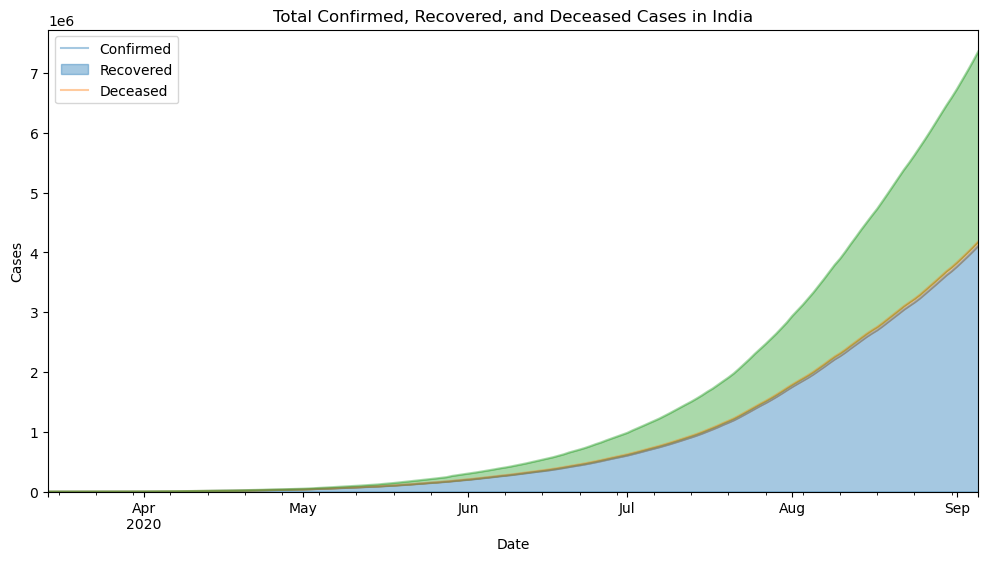

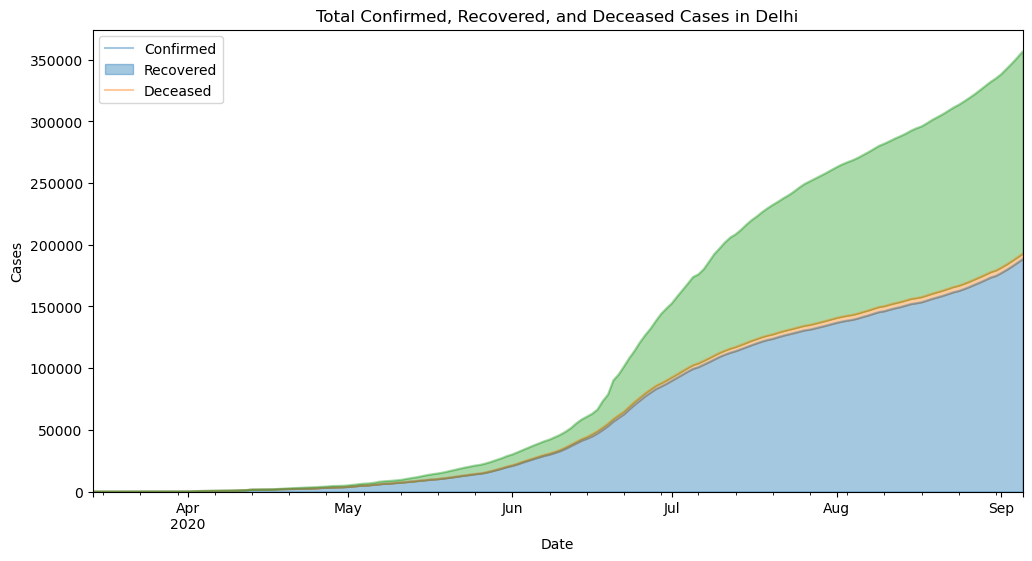

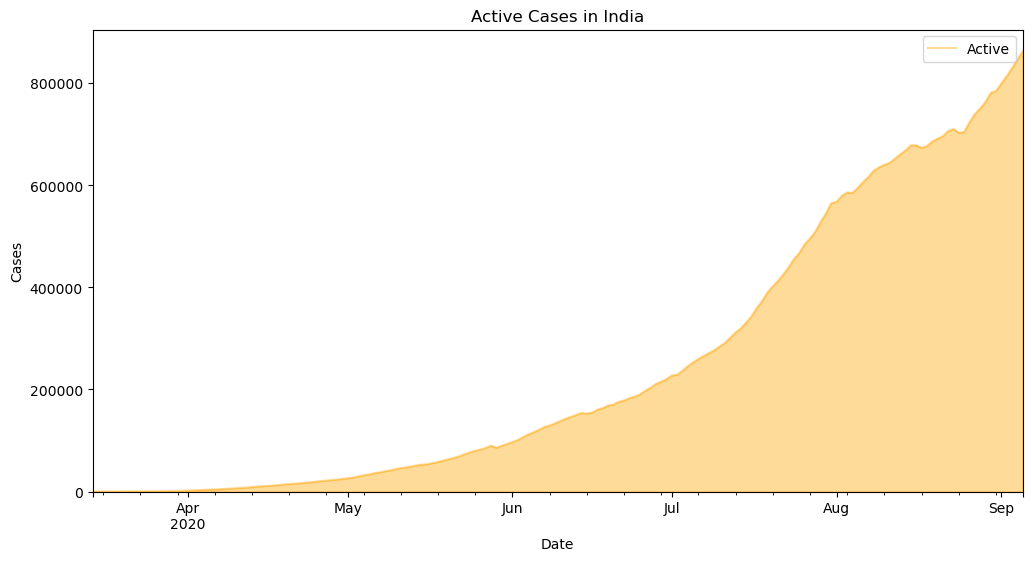

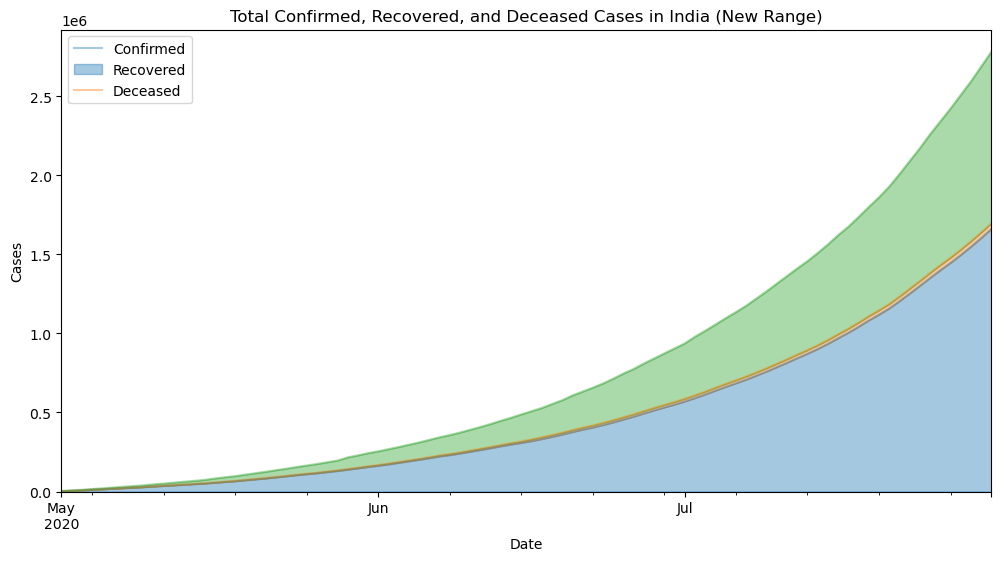

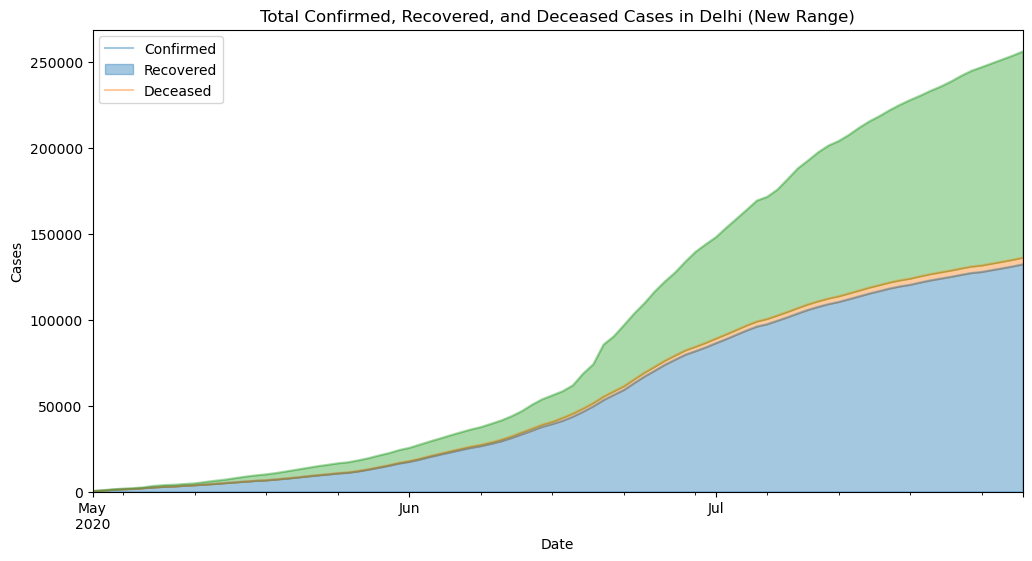

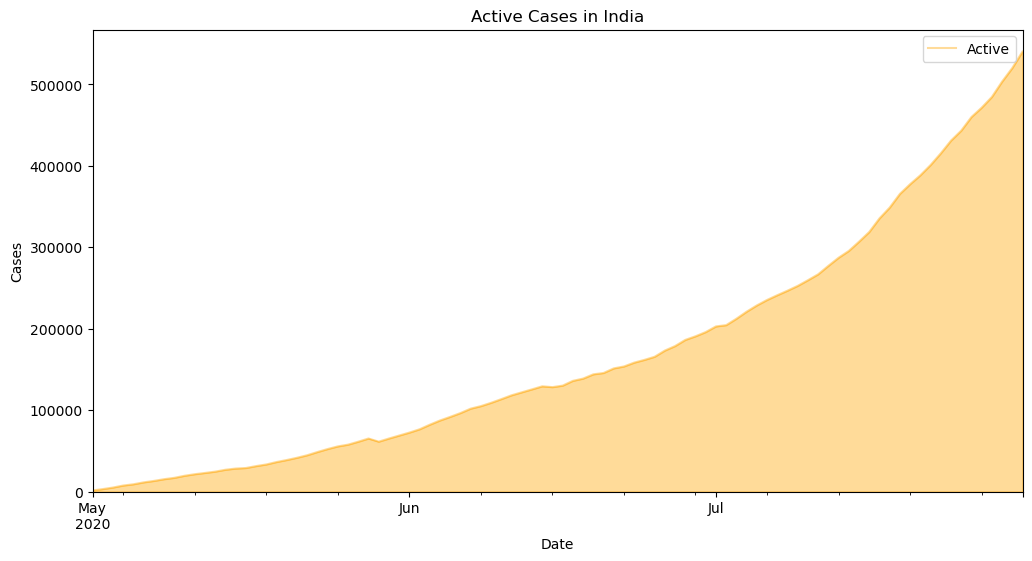

In [7]:
# Convert date column to datetime
df['date'] = pd.to_datetime(df['dateymd'])

# Function to aggregate data between given dates
def aggregate_data(df, start_date, end_date):
    # Filter data by date range
    mask = (df['date'] >= start_date) & (df['date'] <= end_date)
    df_filtered = df[mask]
    
    # Pivot the table to have 'status' as columns
    df_pivot = df_filtered.pivot_table(index='date', columns='status', values='tt', aggfunc='sum').fillna(0)
    
    # Convert to numeric
    df_pivot = df_pivot.apply(pd.to_numeric)
    
    # Calculate cumulative sums
    df_pivot['Confirmed'] = df_pivot['Confirmed'].cumsum()
    df_pivot['Recovered'] = df_pivot['Recovered'].cumsum()
    df_pivot['Deceased'] = df_pivot['Deceased'].cumsum()
    
    return df_pivot

# Function to plot data
def plot_data(df, title, labels):
    df.plot.area(figsize=(12, 6), alpha=0.4)
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Cases')
    plt.legend(labels)
    plt.show()

# Function to aggregate state data between given dates
def aggregate_state_data(df, state, start_date, end_date):
    # Filter data by date range
    mask = (df['date'] >= start_date) & (df['date'] <= end_date) & (df['status'].isin(['Confirmed', 'Recovered', 'Deceased']))
    df_filtered = df[mask]
    
    # Pivot the table to have 'status' as columns
    df_pivot = df_filtered.pivot_table(index='date', columns='status', values=state, aggfunc='sum').fillna(0)
    
    # Convert to numeric
    df_pivot = df_pivot.apply(pd.to_numeric)
    
    # Calculate cumulative sums
    df_pivot['Confirmed'] = df_pivot['Confirmed'].cumsum()
    df_pivot['Recovered'] = df_pivot['Recovered'].cumsum()
    df_pivot['Deceased'] = df_pivot['Deceased'].cumsum()
    
    return df_pivot

# Function to plot active cases
def plot_active_cases(df, start_date, end_date):
    # Aggregate data
    total_data = aggregate_data(df, start_date, end_date)
    
    # Calculate active cases
    total_data['Active'] = total_data['Confirmed'] - (total_data['Recovered'] + total_data['Deceased'])
    
    # Plot active cases
    total_data[['Active']].plot.area(figsize=(12, 6), alpha=0.4, color='orange')
    plt.title('Active Cases in India')
    plt.xlabel('Date')
    plt.ylabel('Cases')
    plt.legend(['Active'])
    plt.show()

# Define start and end dates
start_date = '2020-03-14'
end_date = '2020-09-05'

# 1. Plot area trend line for total "Confirmed", "Recovered" and "Deceased" cases
total_data = aggregate_data(df, start_date, end_date)
plot_data(total_data, 'Total Confirmed, Recovered, and Deceased Cases in India', ['Confirmed', 'Recovered', 'Deceased'])

# 2. Plot area trend line for total "Confirmed", "Recovered" and "Deceased" cases for Delhi
delhi_data = aggregate_state_data(df, 'dl', start_date, end_date)
plot_data(delhi_data, 'Total Confirmed, Recovered, and Deceased Cases in Delhi', ['Confirmed', 'Recovered', 'Deceased'])

# 3. Plot area trend line for active cases
plot_active_cases(df, start_date, end_date)

# Example of using different dates
new_start_date = '2020-05-01'
new_end_date = '2020-07-31'

# Plotting with new date range
total_data_new_range = aggregate_data(df, new_start_date, new_end_date)
plot_data(total_data_new_range, 'Total Confirmed, Recovered, and Deceased Cases in India (New Range)', ['Confirmed', 'Recovered', 'Deceased'])

delhi_data_new_range = aggregate_state_data(df, 'dl', new_start_date, new_end_date)
plot_data(delhi_data_new_range, 'Total Confirmed, Recovered, and Deceased Cases in Delhi (New Range)', ['Confirmed', 'Recovered', 'Deceased'])

plot_active_cases(df, new_start_date, new_end_date)


In [27]:
# Extract data for Delhi and relevant statuses
delhi_confirmed = df_filtered[df_filtered['status'] == 'Confirmed'][['date', 'dl']]
delhi_recovered = df_filtered[df_filtered['status'] == 'Recovered'][['date', 'dl']]
delhi_deceased = df_filtered[df_filtered['status'] == 'Deceased'][['date', 'dl']]

# Prepare data for regression
def prepare_data(df):
    df = df.copy()
    df['days_since'] = (df['date'] - df['date'].min()).dt.days
    return df[['days_since', 'dl']].astype(float)

delhi_confirmed = prepare_data(delhi_confirmed)
delhi_recovered = prepare_data(delhi_recovered)
delhi_deceased = prepare_data(delhi_deceased)

# Linear regression function
def perform_regression(df):
    X = df[['days_since']].values.reshape(-1, 1)
    y = df['dl'].values
    model = LinearRegression()
    model.fit(X, y)
    intercept = model.intercept_
    slope = model.coef_[0]
    return intercept, slope

# Perform regression for each case
confirmed_intercept, confirmed_slope = perform_regression(delhi_confirmed)
recovered_intercept, recovered_slope = perform_regression(delhi_recovered)
deceased_intercept, deceased_slope = perform_regression(delhi_deceased)

print("Confirmed: Intercept =", confirmed_intercept, ", Slope =", confirmed_slope)
print("Recovered: Intercept =", recovered_intercept, ", Slope =", recovered_slope)
print("Deceased: Intercept =", deceased_intercept, ", Slope =", deceased_slope)


Confirmed: Intercept = -266.6043052066402 , Slope = 16.582212206295257
Recovered: Intercept = -394.0186197724249 , Slope = 16.250932466380966
Deceased: Intercept = 11.434756908526674 , Slope = 0.15236884882518104
